In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

from scipy.stats import gamma
from scipy.stats import nbinom
from scipy.special import gamma as gammafun
from scipy.special import gammaln, betaln
import scipy

## Compare Poisson model vs. neg-Bin model 

We generate data from a Poisson model. 

Then we define two models competing for the evidence, one Poisson model with a Gamma prior on lambda and negative Binomial model with a Beta prior. For both models and prior we derive the closed form model evidence. 

Then we generate many data sets with $N$ samples from the true model. For each data set we calculate the model evidence of the two competing models. 

Finally we plot the log Bayes factor and log model evidences. 

## Calculate model evidence

### Poisson
We have derived the closed form of the model evidence for a Poission distribution model with Gamma prior, it is 

$$
E_{poisson}(\alpha, \beta, x, N) = \frac{\beta^{\alpha}}{\Gamma(\alpha)} \frac{1}{\prod_{i=1}^{N} x_i!} \frac{\Gamma(\alpha + \sum x_i)}{(\beta + N)^{\alpha + \sum x_i}}
$$

For numerical stability we instead calculate the log evidence: 

$$
log (E_{poisson}) = \alpha log(\beta) - log(\Gamma(\alpha)) - \sum log(\Gamma(x_i + 1)) + log(\Gamma(\alpha + \sum x_i) - (\alpha + \sum x_i) log(\beta + N)
$$

### Neg-Binomial
For the negative binomial we have derived the model evidence with a Beta prior as

$$
E_{nbinom}(\alpha, \beta, N, r) = \frac{B(\alpha + \sum x_i, \beta + Nr)}{B(\alpha, \beta)} \prod {{x_i + r - 1}\choose{x_i}}
$$

Again, we use the logarithm of that: 
$$
log(E_{nbinom}) = log(B(\alpha + \sum x_i, \beta + Nr)) - log(B(\alpha, \beta)) + \sum log({{x_i + r - 1}\choose{x_i}})
$$

where $r$, the number of failures, is fixed.

In [2]:
def log_poisson_evidence(x, a, b, N): 
    x_sum = np.sum(x)
    log_xfac = np.sum(gammaln(x + 1))
    
    return a * np.log(b) - gammaln(a) - log_xfac + gammaln(a + x_sum) - (a + x_sum)*np.log(b + N)
    
def log_nbin_evidence(x, a, b, N, r=1): 
    x_sum = np.sum(x)
    return betaln(a + x_sum, b + N * r) - betaln(a, b) + np.sum(np.log(scipy.special.binom(x + r - 1, x)))

In [3]:
# define ground truth
true_model = np.random.poisson
lam = 2. 
N = 100

In [4]:
# define prior parameters of each model 
a1, b1 = 2., 0.5 
a2, b2 = 5., 1. 
r = 1

In [5]:
# draw data sets and calculate evidence 
loge1 = []
loge2 = []
for i in range(10): 
    samples = true_model(lam, N)
    loge1.append(log_poisson_evidence(samples, a1, b1, N))
    loge2.append(log_nbin_evidence(samples, a2, b2, N, r=r))

In [7]:
log_bf = np.array(loge1) - np.array(loge2)

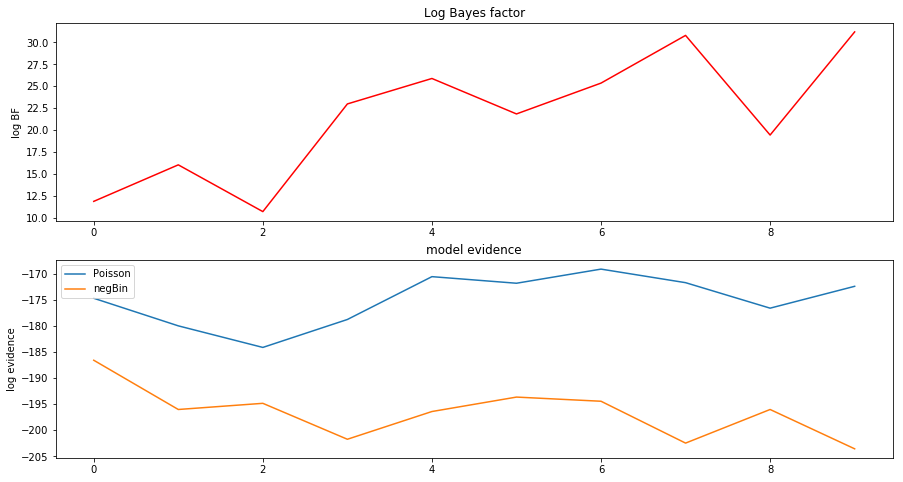

In [9]:
plt.figure(figsize=(15, 8))
plt.subplot(2, 1, 1)
plt.plot(log_bf, 'r')
plt.ylabel('log BF')
plt.title('Log Bayes factor')

plt.subplot(2, 1, 2)
plt.title('model evidence')
plt.plot(loge1)
plt.plot(loge2)
plt.ylabel('log evidence')
plt.legend(['Poisson', 'negBin']);

### As expected, the Poisson model has a much higher evidence